In [481]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# pandas to read csv into excel style dataframe
#matplotlib to create graphs
#sklearn to prepare data with train test split and calculate linear regression

In [482]:
df_houses = pd.read_csv("kc_house_data.csv")
# show what zip codes have the most records
print(df_houses["zipcode"].value_counts())

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64


In [483]:
# df_houses = df_houses.sort_values(["sqft_living"])
#limit house results to one zip code so the data is coming from the same neighborhood
df_houses = df_houses[(df_houses['zipcode'] == 98039) ]
# df_houses = df_houses[(df_houses['sqft_living'] >= 1000) & (df_houses['sqft_living'] <= 10000)]
df_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2974,3625049014,20140829T000000,2950000.0,4,3.5,4860,23885,2.0,0,0,...,12,4860,0,1996,0,98039,47.6172,-122.230,3580,16054
3761,2540700110,20150212T000000,1905000.0,4,3.5,4210,18564,2.0,0,0,...,11,4210,0,2001,0,98039,47.6206,-122.225,3520,18564
4077,3262300940,20141107T000000,875000.0,3,1.0,1220,8119,1.0,0,0,...,7,1220,0,1955,0,98039,47.6328,-122.236,1910,8119
4078,3262300940,20150210T000000,940000.0,3,1.0,1220,8119,1.0,0,0,...,7,1220,0,1955,0,98039,47.6328,-122.236,1910,8119
4149,6447300265,20141014T000000,4000000.0,4,5.5,7080,16573,2.0,0,0,...,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996


In [484]:
#set y to the house sale prices
y = df_houses["price"].values
# set x to the sqft of the house
x = df_houses["sqft_living"].values

In [485]:
X=x.reshape(-1,1)

In [486]:
#train data 80/20 split with test data
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)

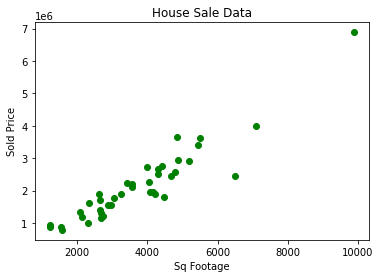

In [487]:
#plot x and y trained data with axis labels
%matplotlib inline
plt.scatter(x_train,y_train,color='green')
plt.xlabel('Sq Footage')
plt.ylabel('Sold Price')
plt.title('House Sale Data')
plt.show()

In [488]:
#run linear regression and print accuracy
lm = LinearRegression()
lm.fit(x_train,y_train)
# line of best fit
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")


Train accuracy 86.74 %
Test accuracy 93.21 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

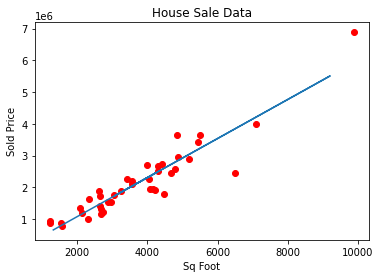

In [489]:
#graph with line of best fit
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Sq Foot")
plt.ylabel("Sold Price")
plt.title("House Sale Data")
plt.plot